# Machine Learning Pipeline

In [1]:
!python --version

Python 3.9.13


In [48]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt

from pickle import load
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Float format
pd.options.display.float_format = '{:,.5f}'.format

# Loading the data

path_single_memristor = './data/Single_memristor_formfactor.dat'
path_coupled_memristor = './data/Coupled_memristors_formfactor.dat'

with open(path_single_memristor, 'rb') as file:
    data_single, v_single, iqp_single, time_single, parameters_single, info_single = load(file)

with open(path_coupled_memristor, 'rb') as file:
    data_coupled, v_coupled, iqp_coupled, time_coupled, parameters_coupled, info_coupled = load(file)

df_single = pd.DataFrame(data_single)
df_coupled = pd.DataFrame(data_coupled)



In [14]:
# Description of Dataset Single

df_single.describe()
#print(df_single.describe().to_latex())

,theta_2,alpha,Formfactor
count,2000.000000,2000.000000,2000.000000
mean,3.085177,50.115547,0.181724
std,1.787681,29.181347,0.085811
min,0.013517,0.176952,0.001295
25%,1.496520,24.855546,0.124916
50%,3.133857,49.663515,0.177362
75%,4.617136,75.723366,0.252894
max,6.219332,99.978500,0.324210


In [15]:
# Description of Dataset Coupled

df_coupled.describe()
#print(df_coupled.describe().to_latex())

,C12,L12,theta,lambda_,Formfactor_1,Formfactor_2
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,9.997431e-13,1.005541e-08,3.127078,50.564400,0.233295,0.233295
std,5.762415e-13,5.769424e-09,1.793585,29.190332,0.047138,0.047138
min,2.603360e-16,1.375470e-12,0.011207,0.112713,0.131976,0.131976
25%,4.959138e-13,5.222546e-09,1.572675,25.383140,0.198993,0.198993
50%,1.001585e-12,9.984281e-09,3.121647,51.046244,0.228886,0.228886
75%,1.500075e-12,1.507848e-08,4.705719,76.515369,0.263234,0.263234
max,1.999185e-12,1.999370e-08,6.218122,99.958549,0.503406,0.503406


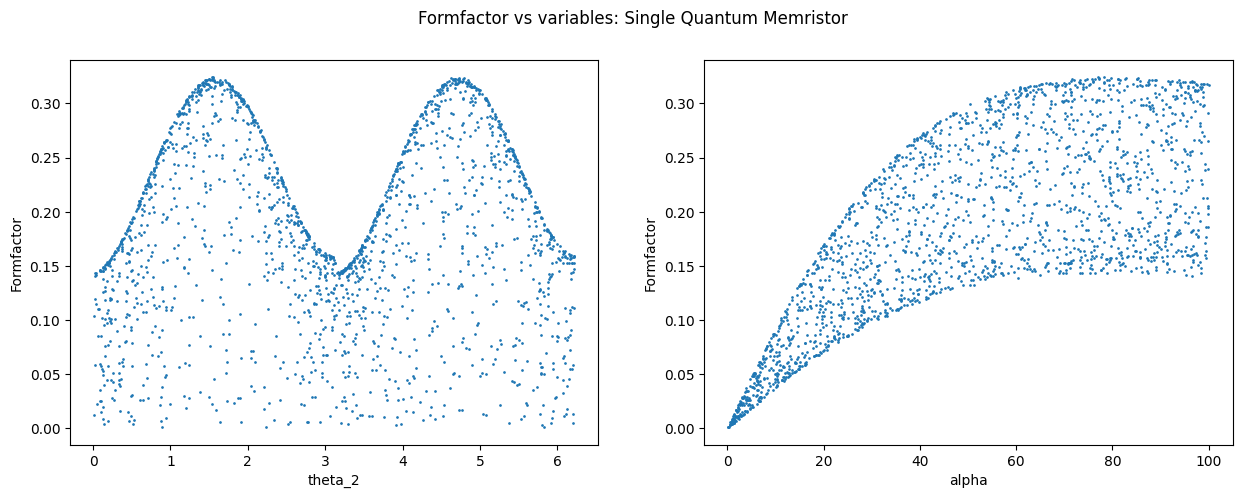

In [37]:
# Plots Single Form Factor vs parameters
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
df = df_single
df.plot(x='theta_2', y='Formfactor', kind='scatter', s=.9, ax=axes[0])
df.plot(x='alpha', y='Formfactor', kind='scatter', s=.9, ax=axes[1])
#axes[0].set_xlabel("$\\theta_2$")
#axes[1].set_xlabel("$\\alpha$")
plt.suptitle("Formfactor vs variables: Single Quantum Memristor")
fig.savefig('./figures/singleqm_ff.pdf')
plt.show()


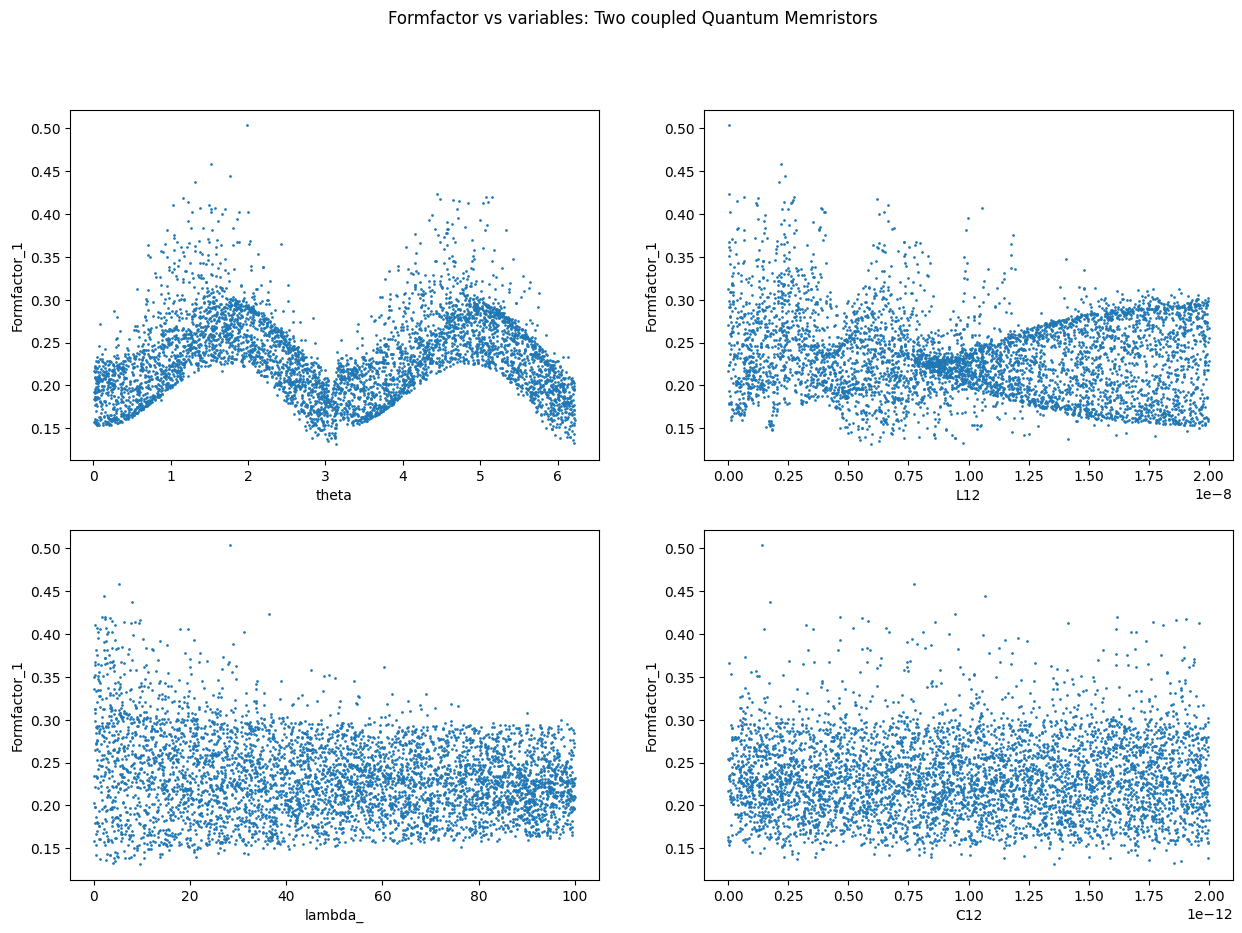

In [36]:
# Plots Single Form Factor vs parameters
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
df = df_coupled
df.plot(x='theta', y='Formfactor_1', kind='scatter', s=.9, ax=axes[0,0])
#df.plot(x='theta', y='Formfactor_2', kind='scatter', s=.9, ax=axes[0,1])
df.plot(x='lambda_', y='Formfactor_1', kind='scatter', s=.9, ax=axes[1,0])
#df.plot(x='lambda_', y='Formfactor_2', kind='scatter', s=.9, ax=axes[1,1])
df.plot(x='L12', y='Formfactor_1', kind='scatter', s=.9, ax=axes[0,1])
#df.plot(x='L12', y='Formfactor_2', kind='scatter', s=.9, ax=axes[2,1])
df.plot(x='C12', y='Formfactor_1', kind='scatter', s=.9, ax=axes[1,1])
#df.plot(x='C12', y='Formfactor_2', kind='scatter', s=.9, ax=axes[3,1])
plt.suptitle("Formfactor vs variables: Two coupled Quantum Memristors")
fig.savefig('./figures/coupledqm_ff.pdf')
plt.show()

In [45]:
# Training Models
xcols_single = df_single.columns[0:2]
xcols_coupled = df_coupled.columns[0:4]

y_single, X_single = df_single.loc[:, df_single.columns[-1]].to_numpy(), df_single.loc[:, xcols_single].to_numpy()
y_coupled, X_coupled = df_coupled.loc[:, df_coupled.columns[-1]].to_numpy(), df_coupled.loc[:, xcols_coupled].to_numpy()

random_state = 42
test_size = 0.33

x_train_single, x_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.33, random_state=42)
x_train_coupled, x_test_coupled, y_train_coupled, y_test_coupled = train_test_split(X_coupled, y_coupled, test_size=0.33, random_state=42)

In [50]:
# Training Single QM

reg_single = LazyRegressor(ignore_warnings=False, custom_metric=None)
models_single, predictions_single = reg_single.fit(x_train_single, x_test_single, y_train_single, y_test_single)
models_single.head(10)

100%|██████████| 42/42 [00:26<00:00,  1.57it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.99985,0.99985,0.00103,0.10279
NuSVR,0.99925,0.99925,0.00229,0.44528
HistGradientBoostingRegressor,0.99800,0.99801,0.00373,0.41981
LGBMRegressor,0.99798,0.99799,0.00375,0.17887
ExtraTreesRegressor,0.99745,0.99746,0.00421,0.13451
RandomForestRegressor,0.99699,0.99700,0.00458,0.24311
BaggingRegressor,0.99594,0.99595,0.00532,0.02603
XGBRegressor,0.99507,0.99508,0.00586,0.10345
KNeighborsRegressor,0.99422,0.99424,0.00635,0.00485


In [51]:
# Training 2 Coupled QM

reg_coupled = LazyRegressor(ignore_warnings=False, custom_metric=None)
models_coupled, predictions_coupled = reg_coupled.fit(x_train_coupled, x_test_coupled, y_train_coupled, y_test_coupled)
models_coupled.head(10)

 74%|███████▍  | 31/42 [17:10<06:05, 33.24s/it]


KeyboardInterrupt: 